DATASET CREATION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import glob

csv_files = glob.glob("/content/drive/MyDrive/Stress_Estimation_Datasets/*.csv")

df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

df.to_csv("BPM_Data_Final.csv", index=False)

print("All CSV files have been merged successfully!")


All CSV files have been merged successfully!


In [ ]:
import pandas as pd

# Load the combined dataset
file_path = "/content/BPM_Data_Final.csv"
df = pd.read_csv(file_path)

# Drop datetime columns if they exist
df.drop(columns=['datetime', 'Datetime'], errors='ignore', inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Display all unique values in the last column before classification
print("🔍 Unique values in the last column before classification:")
print(df['features'].unique())

# Define the stress mapping
stress_mapping = {
    "rest": "No Stress",
    "standing": "No Stress",
    "left fall while standing": "Stress",
    "right fall while standing": "Stress",
    "forward fall while standing": "Stress",
    "sitting": "No Stress",
    "left fall while sitting": "Stress",
    "right fall while sitting": "Stress",
    "forward fall while sitting": "Stress",
    "walking": "No Stress",
    "relax": "No Stress",
    "anxiety": "Stress",
    "sad": "Stress",
    "motivate": "No Stress",
    "stress ball": "Stress",
    "hand at rest": "No Stress",
    "fist": "Stress",
    "funny": "No Stress",
    "walking ": "No Stress"
}

df['features'] = df['features'].astype(str).str.lower().str.strip().map(stress_mapping).fillna("Unknown")

df = df.sort_values(by=['sys', 'dia', 'hr', 'spo2', 'features'])
df = df.drop_duplicates(subset=['sys', 'dia', 'hr', 'spo2'], keep='first')

print("\n Unique values after classification:")
print(df['features'].unique())

updated_file_path = "updated_BPM_data.csv"
df.to_csv(updated_file_path, index=False)

print(f"\n Updated dataset saved as: {updated_file_path}")


🔍 Unique values in the last column before classification:
['Rest' 'Standing' 'Left Fall while Standing' 'Right Fall while Standing'
 'Forward Fall while Standing' 'Sitting' 'Left Fall while Sitting'
 'Right Fall while Sitting' 'Forward Fall while Sitting' 'Walking' 'Relax'
 'Anxiety' 'Sad' 'Motivate' 'Stress Ball' 'Hand at Rest' 'Fist' nan
 'Funny' 'Walking ' 'Funny ']

✅ Unique values after classification:
['No Stress' 'Stress' 'Unknown']

✅ Updated dataset saved as: updated_BPM_data.csv


<ipython-input-31-b3ad1dbce02f>:5: DtypeWarning: Columns (1,2,3,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
# Install required libraries
!pip install tensorflow numpy pandas scikit-learn matplotlib
!pip install pandas numpy scikit-learn joblib

### Random Seed

Random Seed Setup

In [ ]:
import random
import numpy as np
import torch

# Set random seeds for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)  # If using multiple GPUs

# Ensure deterministic behavior in PyTorch
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_path = "/content/updated_BPM_data.csv"
df = pd.read_csv(file_path)

df[['sys', 'dia', 'hr', 'spo2']] = df[['sys', 'dia', 'hr', 'spo2']].apply(pd.to_numeric, errors='coerce')

df[['sys', 'dia', 'hr', 'spo2']] = df[['sys', 'dia', 'hr', 'spo2']].fillna(df.mean(numeric_only=True))

X = df[['sys', 'dia', 'hr', 'spo2']]
y = df['features']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=SEED, stratify=y
)


Random Seed in Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=SEED, stratify=y)


## Random Forest Algorithm(Existing)

Random Seed for Random Forest

### FSL Implementation

Random Seed for FSL

In [ ]:
import torch.nn as nn

class ProtoNet(nn.Module):
    def __init__(self, input_dim=4, hidden_dim=64, output_dim=2):
        super(ProtoNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(SEED)
protonet = ProtoNet().to(device)


In [ ]:
# Install PyTorch (if not installed in Colab)
!pip install torch torchvision -q


In [ ]:
!python -m pip install setfit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## FewShot Learning for Stress Estimation

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from datasets import Dataset
from setfit import SetFitModel, Trainer
from sentence_transformers import SentenceTransformer

file_path = "/content/updated_BPM_data.csv"
df = pd.read_csv(file_path)
df[['sys', 'dia', 'hr', 'spo2']] = df[['sys', 'dia', 'hr', 'spo2']].apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
df = df[df['features'].isin(['No Stress', 'Stress'])]
df['features'] = df['features'].map({'No Stress': 0, 'Stress': 1})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['sys', 'dia', 'hr', 'spo2']])
y = df['features'].values

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42, stratify=y)

train_texts = [f"sys: {x[0]}, dia: {x[1]}, hr: {x[2]}, spo2: {x[3]}" for x in X_train]
test_texts = [f"sys: {x[0]}, dia: {x[1]}, hr: {x[2]}, spo2: {x[3]}" for x in X_test]
train_dataset = Dataset.from_dict({"text": train_texts, "label": y_train.tolist()})
test_dataset = Dataset.from_dict({"text": test_texts, "label": y_test.tolist()})


embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
model = SetFitModel(embedding_model)


class ProtoNet(nn.Module):
    def __init__(self, feature_dim=1024):
        super(ProtoNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(4, 4096),
            nn.ReLU(),
            nn.BatchNorm1d(4096, track_running_stats=False),
            nn.Dropout(0.3),
            nn.Linear(4096, 2048),
            nn.ReLU(),
            nn.BatchNorm1d(2048, track_running_stats=False),
            nn.Dropout(0.3),
            nn.Linear(2048, feature_dim),
            nn.ReLU(),
            nn.BatchNorm1d(feature_dim, track_running_stats=False)
        )

    def forward(self, x):
        if self.training or x.shape[0] > 1:
            return self.encoder(x)
        else:
            for layer in self.encoder:
                if isinstance(layer, nn.BatchNorm1d):
                    continue
                x = layer(x)
            return x


def euclidean_distance(a, b):
    return torch.cdist(a, b, p=2)

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=0.25):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        p_t = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - p_t) ** self.gamma * ce_loss
        return focal_loss.mean()

device = "cuda" if torch.cuda.is_available() else "cpu"
protonet = ProtoNet().to(device)
optimizer = optim.AdamW(protonet.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)
loss_function = FocalLoss()

early_stopping_patience = 10
best_val_acc = 0
patience_counter = 0

batch_size = 64
train_loader = DataLoader(TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long)), batch_size=batch_size, shuffle=False)

for epoch in range(300):
    protonet.train()
    epoch_loss = 0.0
    correct, total = 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        embeddings = protonet(inputs)
        class_prototypes = torch.stack([embeddings[labels == i].mean(0) for i in torch.unique(labels) if (labels == i).sum() > 0])
        dists = euclidean_distance(embeddings, class_prototypes)
        loss = loss_function(-dists, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(protonet.parameters(), max_norm=1.0)
        optimizer.step()
        epoch_loss += loss.item()
        preds = torch.argmin(dists, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    train_acc = correct / total
    scheduler.step(epoch_loss)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss/len(train_loader):.4f}, Train Accuracy: {train_acc*100:.2f}%")

    if train_acc > best_val_acc:
        best_val_acc = train_acc
        patience_counter = 0
    else:
        patience_counter += 1
    if patience_counter >= early_stopping_patience:
        print("Early stopping triggered.")
        break

def evaluate_protonet(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            embeddings = model(inputs)
            class_prototypes = torch.stack([embeddings[labels == i].mean(0) for i in torch.unique(labels) if (labels == i).sum() > 0])
            dists = euclidean_distance(embeddings, class_prototypes)
            preds = torch.argmin(dists, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    acc = correct / total
    print(f"Final Test Accuracy: {acc * 100:.2f}%")
    return acc

evaluate_protonet(protonet, test_loader)

Epoch 1, Loss: 0.1367, Train Accuracy: 67.35%
Epoch 2, Loss: 0.1040, Train Accuracy: 69.53%
Epoch 3, Loss: 0.0904, Train Accuracy: 71.80%
Epoch 4, Loss: 0.0754, Train Accuracy: 71.88%
Epoch 5, Loss: 0.0677, Train Accuracy: 72.34%
Epoch 6, Loss: 0.0614, Train Accuracy: 75.33%
Epoch 7, Loss: 0.0574, Train Accuracy: 76.44%
Epoch 8, Loss: 0.0487, Train Accuracy: 77.49%
Epoch 9, Loss: 0.0435, Train Accuracy: 78.30%
Epoch 10, Loss: 0.0354, Train Accuracy: 80.75%
Epoch 11, Loss: 0.0267, Train Accuracy: 84.50%
Epoch 12, Loss: 0.0219, Train Accuracy: 86.55%
Epoch 13, Loss: 0.0185, Train Accuracy: 87.65%
Epoch 14, Loss: 0.0195, Train Accuracy: 87.79%
Epoch 15, Loss: 0.0197, Train Accuracy: 87.76%
Epoch 16, Loss: 0.0204, Train Accuracy: 87.22%
Epoch 17, Loss: 0.0208, Train Accuracy: 86.49%
Epoch 18, Loss: 0.0193, Train Accuracy: 87.65%
Epoch 19, Loss: 0.0196, Train Accuracy: 88.08%
Epoch 20, Loss: 0.0188, Train Accuracy: 88.24%
Epoch 21, Loss: 0.0190, Train Accuracy: 87.84%
Epoch 22, Loss: 0.0181

0.9694656488549618

In [ ]:

model_save_path = "protonet_model.pt"
torch.save({
    'model_state_dict': protonet.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scaler': scaler  # if you want to save the scaler too
}, model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to protonet_model.pt


In [ ]:
import pickle

pkl_save_path = "protonet_model.pkl"
with open(pkl_save_path, "wb") as f:
    pickle.dump({"model": protonet, "scaler": scaler}, f)

print(f"Model and scaler saved to {pkl_save_path}")


Model and scaler saved to protonet_model.pkl


Compute Predictions on Test Data

In [ ]:
import torch


protonet.eval()


all_preds = []
all_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        embeddings = protonet(inputs)

        class_prototypes = torch.stack([
            embeddings[labels == i].mean(0) for i in torch.unique(labels)
        ])

        dists = euclidean_distance(embeddings, class_prototypes)

        preds = torch.argmin(dists, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_true.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_true = np.array(all_true)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(all_true, all_preds)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 96.95%


CONFUSION MATRIX

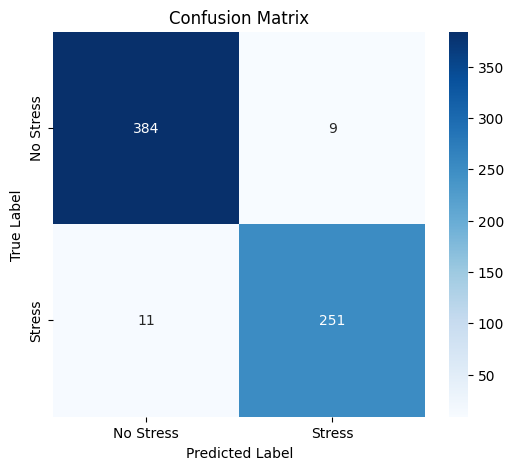

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(all_true, all_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stress", "Stress"], yticklabels=["No Stress", "Stress"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Precision, Recall, and F1-score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(all_true, all_preds)
recall = recall_score(all_true, all_preds)
f1 = f1_score(all_true, all_preds)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.97
Recall: 0.96
F1 Score: 0.96


ROC Curve

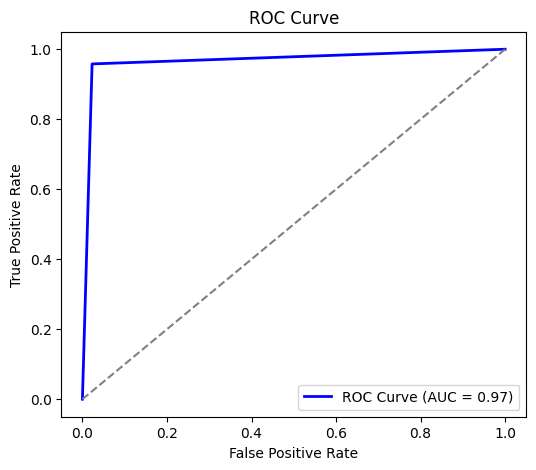

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(all_true, all_preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


Precision-Recall Curve

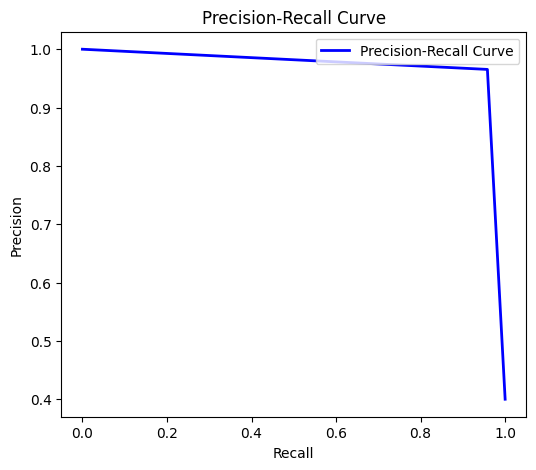

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, _ = precision_recall_curve(all_true, all_preds)

plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, color='blue', lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()


In [ ]:
import torch
import numpy as np
import pandas as pd


input_data = np.array([[131, 83, 140, 96]])

input_df = pd.DataFrame(input_data, columns=['sys', 'dia', 'hr', 'spo2'])

input_data_scaled = scaler.transform(input_df)

input_tensor = torch.tensor(input_data_scaled, dtype=torch.float32).to(device)
protonet.eval()
for module in protonet.modules():
    if isinstance(module, torch.nn.BatchNorm1d):
        module.track_running_stats = False
        module.momentum = None

with torch.no_grad():
    input_embedding = protonet(input_tensor)
    all_embeddings = []
    all_labels = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        embeddings = protonet(inputs)
        all_embeddings.append(embeddings)
        all_labels.append(labels)

    all_embeddings = torch.cat(all_embeddings)
    all_labels = torch.cat(all_labels)
    feature_dim = input_embedding.shape[1]
    class_prototypes = torch.stack([all_embeddings[all_labels == i].mean(0) for i in torch.unique(all_labels)])

    if class_prototypes.shape[1] != feature_dim:
        class_prototypes = class_prototypes[:, :feature_dim]
    dists = euclidean_distance(input_embedding, class_prototypes)

    pred_class = torch.argmin(dists, dim=1).item()

    stress_label = "Stress" if pred_class == 1 else "No Stress"

print(f"Predicted Stress Level: {stress_label}")


Predicted Stress Level: Stress


Comparision with other models

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-37-d1b0e81c1399>:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//2, i%2].set_xticklabels(results.keys(), rotation=20)
<ipython-input-37-d1b0e81c1399>:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//2, i%2].set_xticklabels(results.keys(), rotation=20)
<ipython-input-37-d1b0e81c1399>:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//2, i%2].set_xticklabels(results.keys(), rotation=20)
<ipython-input-37-d1b0e81c1399>:72: UserWarning: set_ticklabels() should only be used with a fixed number o


Performance Comparison:

               Accuracy Precision    Recall  F1 Score
Decision Tree  0.835115  0.783088  0.812977  0.797753
Random Forest  0.879389  0.842697  0.858779  0.850662
XGBoost        0.870229  0.844358  0.828244  0.836224
FSL            0.969466  0.965385  0.958015  0.961686


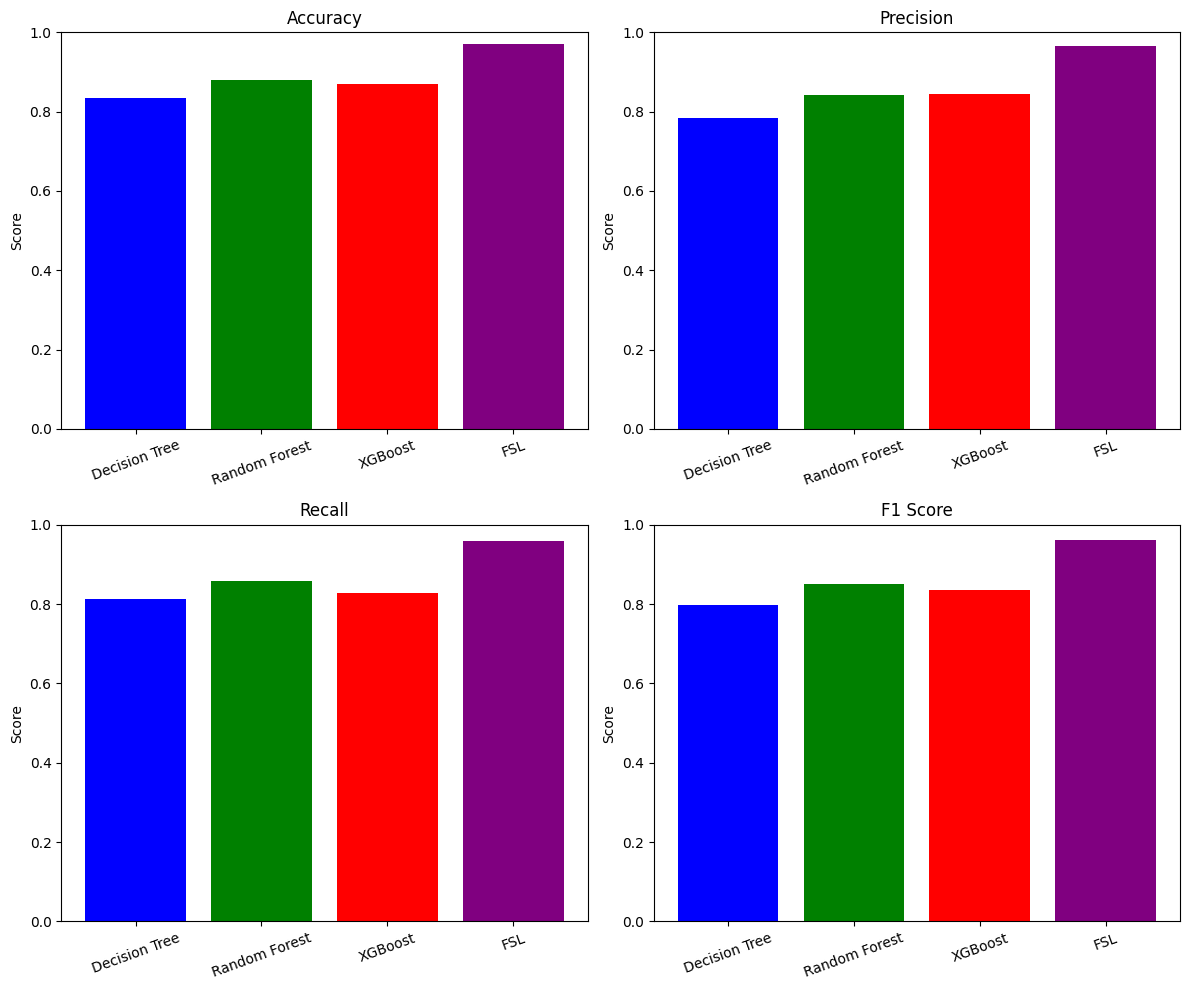

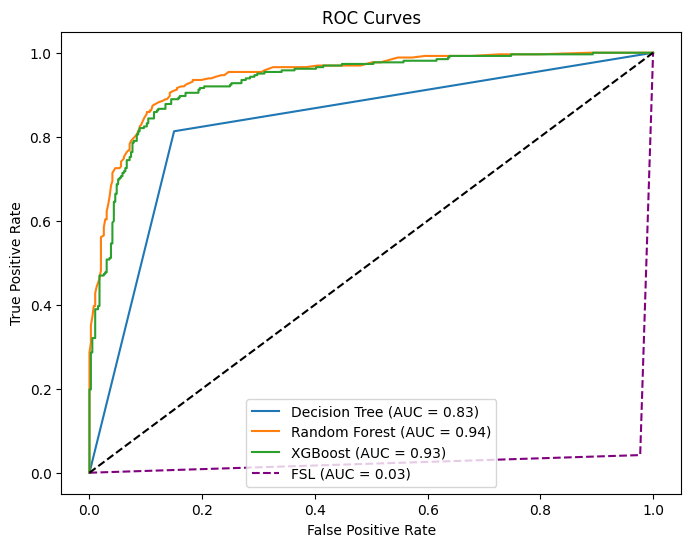

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
file_path = "/content/updated_BPM_data.csv"
df = pd.read_csv(file_path)
df[['sys', 'dia', 'hr', 'spo2']] = df[['sys', 'dia', 'hr', 'spo2']].apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
df = df[df['features'].isin(['No Stress', 'Stress'])]
df['features'] = df['features'].map({'No Stress': 0, 'Stress': 1})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['sys', 'dia', 'hr', 'spo2']])
y = df['features'].values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42, stratify=y)

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

results["FSL"] = {
    "Accuracy": accuracy_score(all_true, all_preds),
    "Precision": precision_score(all_true, all_preds),
    "Recall": recall_score(all_true, all_preds),
    "F1 Score": f1_score(all_true, all_preds),
    "Confusion Matrix": confusion_matrix(all_true, all_preds)
}

print("\nPerformance Comparison:\n")
print(pd.DataFrame(results).T[['Accuracy', 'Precision', 'Recall', 'F1 Score']])

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in results]
    axes[i//2, i%2].bar(results.keys(), values, color=['blue', 'green', 'red', 'purple'])
    axes[i//2, i%2].set_title(metric)
    axes[i//2, i%2].set_ylim(0, 1)
    axes[i//2, i%2].set_ylabel("Score")
    axes[i//2, i%2].set_xticklabels(results.keys(), rotation=20)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

protonet_probs = -torch.cdist(torch.tensor(all_preds, dtype=torch.float32).unsqueeze(1),
                              torch.tensor(all_true, dtype=torch.float32).unsqueeze(1),
                              p=2).numpy()

fpr, tpr, _ = roc_curve(all_true, protonet_probs[:, 0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'FSL (AUC = {roc_auc:.2f})', linestyle='dashed', color='purple')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()
